In [1]:
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['pdf.fonttype'] = 42

In [2]:
def doplot(df):
    plot = sns.lineplot(data=df)
    plot.get_figure().savefig("smac-{}.pdf".format(corpus))    

In [3]:
def readData(corpus):
    """
    Reads the individual progression files for each split of BA or CT and creates one large
    data frame where each dataset is a column
    """
    dfs = []
    for i in range(10):
        df = pd.read_csv("smac-{}progression-split{}.csv".format(corpus,i))
        dfs.append(df)
    length=max([max(x['run number']) for x in dfs])
    ref = pd.DataFrame(0.0,index=pd.Index(range(length),name='run number'),columns=['infNDCG'])
    stacked = None
    for i in range(len(dfs)):
        df = dfs[i]
        df = df.set_index('run number')
        ref = pd.merge(left=ref,right=df,on='run number',how='left',suffixes=['_left{}'.format(i), '_right{}'.format(i)])
    ref = ref.fillna(method='ffill').fillna(method='bfill').drop('infNDCG_left0',axis=1)
    return ref

In [4]:
def arrangeDataForPlotting(ref):
    s = ref.sample(frac=.1).stack()
    s.index = s.index.droplevel(1)
    s = pd.DataFrame(s)
    s['run number'] = s.index
    s.columns=['infNDCG', 'run number']
    s.index = pd.Index(range(len(s)))
    return s
    #sns.lineplot(x='run number', y='infNDCG', data=s)

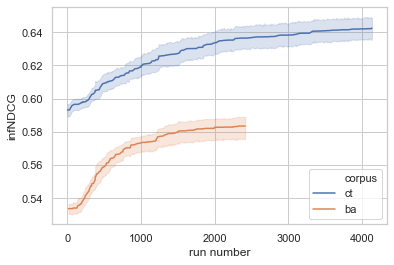

In [5]:
ct = arrangeDataForPlotting(readData('ct'))
ba = arrangeDataForPlotting(readData('ba'))
ct["corpus"] = 'ct'
ba["corpus"] = 'ba'
both = pd.concat([ct,ba])
plot = sns.lineplot(x='run number', y='infNDCG', data=both, hue='corpus')
plot.axes.legend(loc='lower right')
plot.get_figure().savefig('smac-ctba.pdf')